In [112]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [113]:
import numpy as np
import pandas as pd

In [114]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [115]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float

Base = declarative_base()

In [89]:
#Connecting to the database 
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#creating connection
conn = engine.connect()

In [90]:
#Reading data into Pandas
hw_df = pd.read_sql('SELECT date, prcp FROM measurement WHERE date BETWEEN "2016-08-23" AND "2017-08-23"', conn)
#showing data frame
hw_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [91]:
#sorting data frame
hw_df.sort_values(by='date')
# hw_df

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


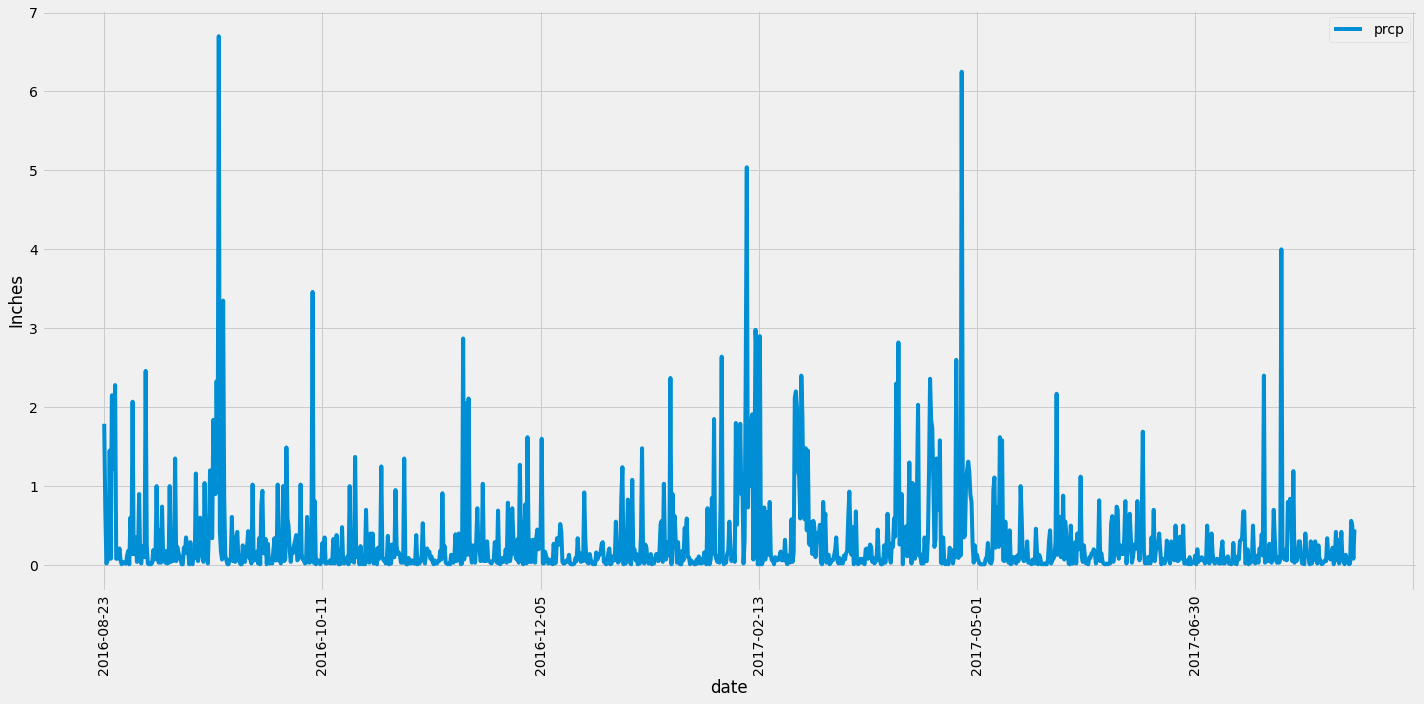

In [57]:

#Plotting prcp data
hw_df_plot = hw_df.plot(x='date',y='prcp', rot=90, figsize=(20,10))

#labeling y label
plt.ylabel('Inches')

#showing chart
plt.show()

In [58]:
#showing summary stats
hw_df.describe()

,prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [137]:
#dropping Null values before passing into dictionary
hw_df.dropna(how='any',inplace=True)

#transposing data frame to dict to create object in flask script 
hw_df.set_index('date').T.to_dict('list')


<ipython-input-137-6185e9e7baff>:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  hw_df.set_index('date').T.to_dict('list')


{'2016-08-23': [0.7],
 '2016-08-24': [1.45],
 '2016-08-25': [0.11],
 '2016-08-26': [0.01],
 '2016-08-27': [0.12],
 '2016-08-28': [2.07],
 '2016-08-29': [0.9],
 '2016-08-30': [0.05],
 '2016-08-31': [2.46],
 '2016-09-01': [0.01],
 '2016-09-02': [0.03],
 '2016-09-03': [1.0],
 '2016-09-04': [0.44],
 '2016-09-07': [1.35],
 '2016-09-08': [0.15],
 '2016-09-09': [0.35],
 '2016-09-10': [1.16],
 '2016-09-11': [0.6],
 '2016-09-12': [1.04],
 '2016-09-13': [1.2],
 '2016-09-14': [6.7],
 '2016-09-15': [3.35],
 '2016-09-16': [0.61],
 '2016-09-17': [0.23],
 '2016-09-18': [0.42],
 '2016-09-19': [0.25],
 '2016-09-20': [0.43],
 '2016-09-21': [1.02],
 '2016-09-22': [0.75],
 '2016-09-23': [0.33],
 '2016-09-24': [0.27],
 '2016-09-25': [0.04],
 '2016-09-26': [1.02],
 '2016-09-27': [1.0],
 '2016-09-28': [0.05],
 '2016-09-29': [1.49],
 '2016-09-30': [0.38],
 '2016-10-01': [1.02],
 '2016-10-02': [0.61],
 '2016-10-03': [0.46],
 '2016-10-04': [3.46],
 '2016-10-05': [0.81],
 '2016-10-06': [0.04],
 '2016-10-07': [0.

In [107]:
#Connecting to the database for stattion queries
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#creating connection
conn = engine.connect()

In [108]:
#Reading data into Pandas for stattion queries
st_df = pd.read_sql('SELECT * FROM measurement WHERE date BETWEEN "2016-08-23" AND "2017-08-23"', conn)
#showing data frame
st_df = st_df.drop(columns='id')
st_df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [109]:
#number of unique station
len(st_df['station'].unique())

9

In [126]:
#grouping by station id to count activity
st_grouped_df = st_df[['station','prcp']].groupby('station').count().reset_index()

#setting column names
st_grouped_df.columns=['station', 'station cnt']

#sorting values by activity in stattion
st_grouped_df = st_grouped_df.sort_values(by='station cnt',ascending=False)

#restting index after sort
st_grouped_df = st_grouped_df.reset_index(drop=True)

#showing station with most activity 
st_grouped_df.head(1)


,station,station cnt
0,USC00519281,2772


In [127]:
# query to get tobs data filtered by station with the most activity
tobs_df = pd.read_sql(
    'SELECT * FROM measurement WHERE date BETWEEN "2016-08-23" AND "2017-08-23" AND station ="USC00519281"', conn)
tobs_df

,id,station,date,prcp,tobs
0,14608,USC00519281,2016-08-23,1.79,77.0
1,14609,USC00519281,2016-08-24,2.15,77.0
2,14610,USC00519281,2016-08-25,0.06,80.0
3,14611,USC00519281,2016-08-26,0.01,80.0
4,14612,USC00519281,2016-08-27,0.12,75.0
...,...,...,...,...,...
347,14955,USC00519281,2017-08-14,0.00,77.0
348,14956,USC00519281,2017-08-15,0.32,77.0
349,14957,USC00519281,2017-08-16,0.12,76.0
350,14958,USC00519281,2017-08-17,0.01,76.0


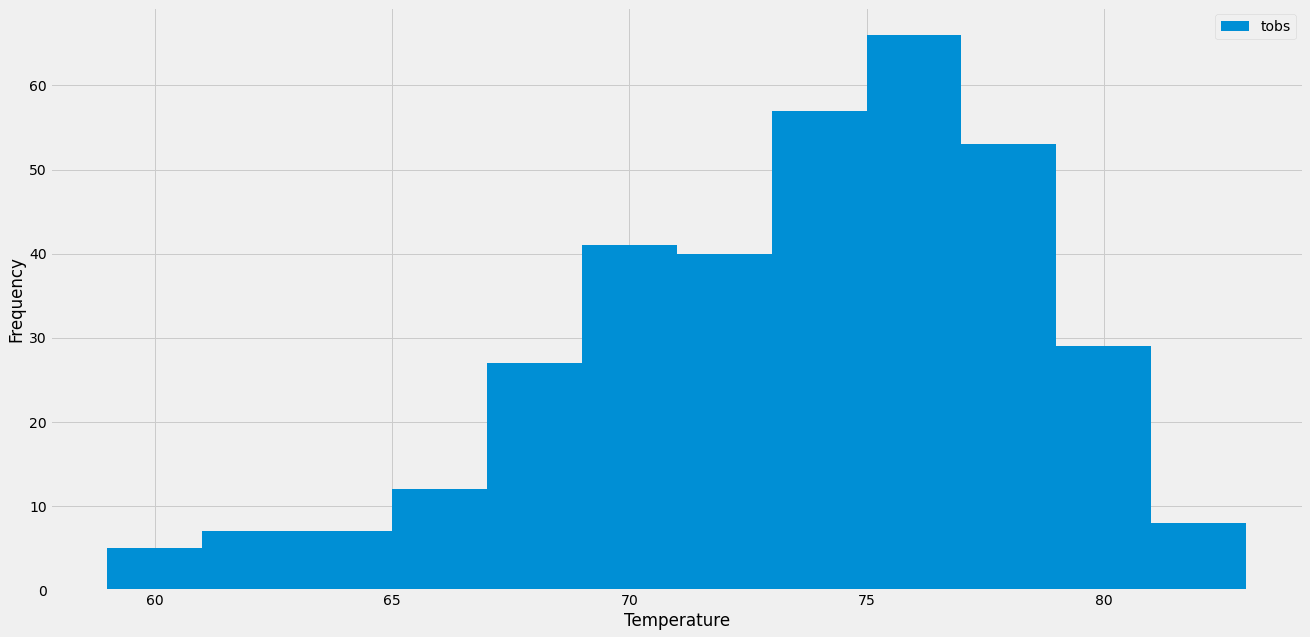

In [132]:
#Plotting prcp data
tobs_df_plot = tobs_df['tobs'].plot.hist(bins=12, rot=360, figsize=(20,10))

#showing legends
plt.legend()

#labeling y label
plt.ylabel('Frequency')
plt.xlabel('Temperature')

#showing chart
plt.show()

In [10]:
# reflect an existing database into a new model



# reflect the tables


In [ ]:
# We can view all of the classes that automap found


In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
